In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df1 = pd.read_csv('df_ant1_30.csv') # in each channel we have 96 data points per antenna
df2 = pd.read_csv('df_ant2_30.csv')
df3 = pd.read_csv('df_ant3_30.csv')

In [3]:
X12 = (df1['I'] + 1j*df1['Q']) * (df2['I'] - 1j*df2['Q'])
X23 = (df2['I'] + 1j*df2['Q']) * (df3['I'] - 1j*df3['Q'])
X13 = (df1['I'] + 1j*df1['Q']) * (df3['I'] - 1j*df3['Q'])

In [4]:
d = {'channel': df1['Channel'],'x12': X12, 'x23': X23, 'x13': X13, 'idx1':df1['sample_idx'], 'idx2':df2['sample_idx'], 'idx3':df3['sample_idx']}
data = pd.DataFrame(data=d)
data['phi12'] = np.angle(X12)* 180/(2*np.pi)
data['phi23'] = np.angle(X23)* 180/(2*np.pi)
data['phi13'] = np.angle(X13)* 180/(2*np.pi)
data
data.to_csv('phi_30degree.csv', index = False)

In [5]:
from filterpy.kalman import KalmanFilter

In [6]:
from filterpy.common import Q_discrete_white_noise

In [7]:
f = KalmanFilter (dim_x=2, dim_z=1)

In [8]:
f.x = np.array([[30.],   # theta
                [0.]])  #omega
f.F = np.array([[1.,0],
                [1.,1.]])
f.H = np.array([[1,0]])
f.P *= 1000.
# f.R = 5 # scalar
f.R = np.array([[1.]]) # dimentional
f.Q = 1

In [9]:
z12 = data['phi12']
results = []
for i in range(len(z12)):
    f.predict()
    f.update(z12[i])
    results.append(f.x)
#     print(f.x)
res_arr = np.asarray(results)
data['phi12_kf'] = res_arr[:,0]  
data['omega12_kf'] = res_arr[:,1]  

In [10]:
z23 = data['phi23']
results = []
for i in range(len(z23)):
    f.predict()
    f.update(z23[i])
    results.append(f.x)
res_arr = np.asarray(results)
data['phi23_kf'] = res_arr[:,0]
data['omega23_kf'] = res_arr[:,1]  

In [11]:
z13 = data['phi13']
results = []
for i in range(len(z13)):
    f.predict()
    f.update(z13[i])
    results.append(f.x)
res_arr = np.asarray(results)
data['phi13_kf'] = res_arr[:,0] 
data['omega13_kf'] = res_arr[:,1]  

C:\Users\pooneh\AppData\Local\Continuum\anaconda3\envs\py3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\pooneh\AppData\Local\Continuum\anaconda3\envs\py3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


array([<AxesSubplot:>], dtype=object)

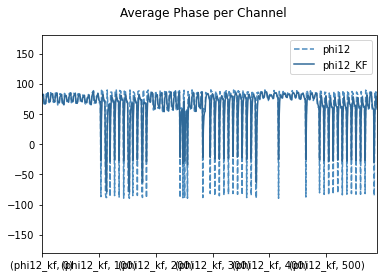

In [12]:
data.unstack(level=0)[['phi12']].plot(subplots=True, title="Average Phase per Channel", xlim=[0,588], ylim=[-180,+180], color = '#4B8BBE', linestyle='dashed',  label='phi12', legend=True)
data.unstack(level=0)[['phi12_kf']].plot(subplots=True, title="Average Phase per Channel", xlim=[0,588], ylim=[-180,+180], color= '#306998', label='phi12_KF', legend=True)

C:\Users\pooneh\AppData\Local\Continuum\anaconda3\envs\py3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\pooneh\AppData\Local\Continuum\anaconda3\envs\py3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\pooneh\AppData\Local\Continuum\anaconda3\envs\py3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


array([<AxesSubplot:>], dtype=object)

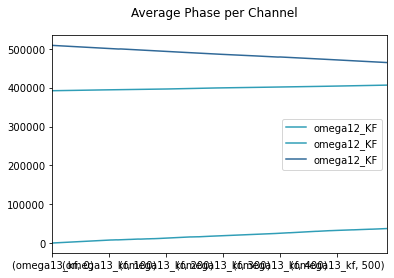

In [13]:
data.unstack(level=0)[['omega12_kf']].plot(subplots=True, title="Average Phase per Channel", xlim=[0,588], color= '#309EB7', label='omega12_KF', legend=True)
data.unstack(level=0)[['omega23_kf']].plot(subplots=True, title="Average Phase per Channel", xlim=[0,588], color= '#309EB7', label='omega12_KF', legend=True)
data.unstack(level=0)[['omega13_kf']].plot(subplots=True, title="Average Phase per Channel", xlim=[0,588], color= '#306998', label='omega12_KF', legend=True)

C:\Users\pooneh\AppData\Local\Continuum\anaconda3\envs\py3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\pooneh\AppData\Local\Continuum\anaconda3\envs\py3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


array([<AxesSubplot:>], dtype=object)

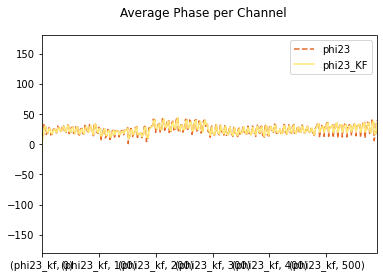

In [14]:
data.unstack(level=0)[['phi23']].plot(subplots=True, title="Average Phase per Channel", xlim=[0,588], ylim=[-180,+180], color= '#E4682A', linestyle='dashed', label='phi23', legend=True)
data.unstack(level=0)[['phi23_kf']].plot(subplots=True, title="Average Phase per Channel",xlim=[0,588],  ylim=[-180,+180], color= '#FFE873',  label='phi23_KF', legend=True)

C:\Users\pooneh\AppData\Local\Continuum\anaconda3\envs\py3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\pooneh\AppData\Local\Continuum\anaconda3\envs\py3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


array([<AxesSubplot:>], dtype=object)

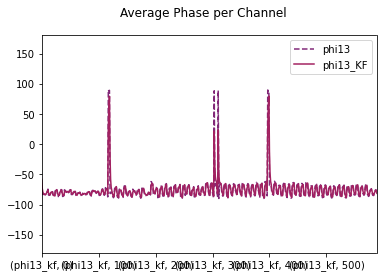

In [15]:
data.unstack(level=0)[['phi13']].plot(subplots=True, title="Average Phase per Channel",xlim=[0,588], ylim=[-180,+180], color= '#812878', linestyle='dashed',  label='phi13', legend=True)
data.unstack(level=0)[['phi13_kf']].plot(subplots=True, title="Average Phase per Channel", xlim=[0,588],ylim=[-180,+180], color= '#A22160', label='phi13_KF', legend=True)

In [16]:
phi_channel = []
for i in range(0, len(data),96):
    phi_channel.append({"channel":data['channel'][i], 
                       "ave_phi12": np.average(data['phi12'][i-96:i]),
                       "ave_phi23": np.average(data['phi23'][i-96:i]), 
                       "ave_phi13": np.average(data['phi13'][i-96:i]),
                       "teta12_kf": np.average(data['phi12_kf'][i-96:i]),
                       "teta23_kf": np.average(data['phi23_kf'][i-96:i]),
                       "teta13_kf": np.average(data['phi13_kf'][i-96:i]), 
                       "omega12": np.average(data['omega12_kf'][i-96:i]),
                       "omega23": np.average(data['omega23_kf'][i-96:i]),
                       "omega13": np.average(data['omega13_kf'][i-96:i])})
average_phi_perchannel = pd.DataFrame(phi_channel)
average_phi_perchannel =  average_phi_perchannel.drop([0])
average_phi_perchannel

C:\Users\pooneh\AppData\Local\Continuum\anaconda3\envs\py3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\pooneh\AppData\Local\Continuum\anaconda3\envs\py3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,channel,ave_phi12,ave_phi23,ave_phi13,teta12_kf,teta23_kf,teta13_kf,omega12,omega23,omega13
1,31,75.653014,23.536170,-80.810817,75.742535,22.864865,-80.431572,3687.187796,393544.954657,505354.461652
2,26,49.969694,19.452901,-74.952405,49.958780,19.489735,-74.927336,9690.623069,395631.170956,498037.238202
3,8,62.459766,30.975733,-77.189501,62.564632,30.890030,-77.184733,15266.572517,398066.490353,490613.507047
4,7,60.839003,21.797177,-71.113819,60.702325,21.931425,-71.104080,21091.150902,400606.909314,483594.129393
5,27,77.362222,23.266263,-69.996515,77.352024,23.289071,-69.980831,27697.509372,402761.859793,476912.938342
...,...,...,...,...,...,...,...,...,...,...
69,17,74.815598,25.136404,-80.047998,74.357302,24.466639,-79.893856,373052.485946,503252.734555,87847.539678
70,35,5.381722,-10.011309,-23.379588,6.052947,-9.526484,-24.219833,377175.510870,504029.155729,82771.985776
71,16,75.449462,23.891746,-80.658791,74.770414,23.425585,-79.807706,380777.532029,504635.982413,77875.833620
72,34,10.842352,5.999205,-26.283444,11.579823,6.318528,-26.635718,385135.655716,506080.137191,73076.862085


array([<AxesSubplot:>], dtype=object)

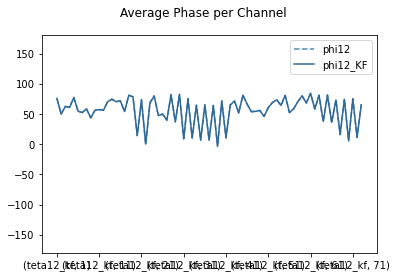

In [17]:
average_phi_perchannel.unstack(level=0)[['ave_phi12']].plot(subplots=True, title="Average Phase per Channel", ylim=[-180,+180], color = '#4B8BBE', linestyle='dashed',  label='phi12', legend=True)
average_phi_perchannel.unstack(level=0)[['teta12_kf']].plot(subplots=True, title="Average Phase per Channel", ylim=[-180,+180], color= '#306998', label='phi12_KF', legend=True)

array([<AxesSubplot:>], dtype=object)

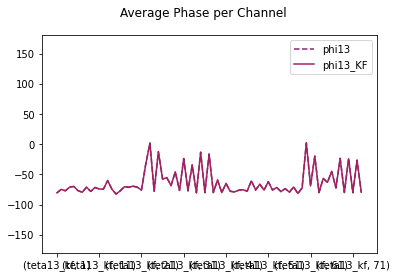

In [18]:
average_phi_perchannel.unstack(level=0)[['ave_phi13']].plot(subplots=True, title="Average Phase per Channel", ylim=[-180,+180], color= '#812878', linestyle='dashed',  label='phi13', legend=True)
average_phi_perchannel.unstack(level=0)[['teta13_kf']].plot(subplots=True, title="Average Phase per Channel", ylim=[-180,+180], color= '#A22160', label='phi13_KF', legend=True)


array([<AxesSubplot:>], dtype=object)

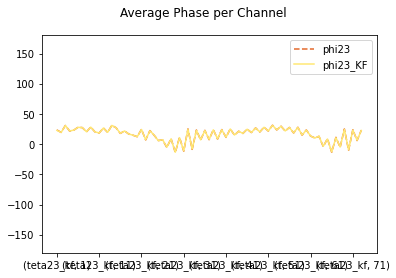

In [19]:
average_phi_perchannel.unstack(level=0)[['ave_phi23']].plot(subplots=True, title="Average Phase per Channel", ylim=[-180,+180], color= '#E4682A', linestyle='dashed', label='phi23', legend=True)
average_phi_perchannel.unstack(level=0)[['teta23_kf']].plot(subplots=True, title="Average Phase per Channel", ylim=[-180,+180], color= '#FFE873',  label='phi23_KF', legend=True)

In [20]:
print(np.average(average_phi_perchannel['ave_phi12']), np.average(average_phi_perchannel['ave_phi23']), np.average(average_phi_perchannel['ave_phi13']))
print(np.average(average_phi_perchannel['teta12_kf']), np.average(average_phi_perchannel['teta23_kf']), np.average(average_phi_perchannel['teta13_kf']))

55.896013398952896 16.571512987165796 -63.55987087415529
55.89750717739711 16.562617317804495 -63.55411963224195


In [21]:
average_phi_perchannel

,channel,ave_phi12,ave_phi23,ave_phi13,teta12_kf,teta23_kf,teta13_kf,omega12,omega23,omega13
1,31,75.653014,23.536170,-80.810817,75.742535,22.864865,-80.431572,3687.187796,393544.954657,505354.461652
2,26,49.969694,19.452901,-74.952405,49.958780,19.489735,-74.927336,9690.623069,395631.170956,498037.238202
3,8,62.459766,30.975733,-77.189501,62.564632,30.890030,-77.184733,15266.572517,398066.490353,490613.507047
4,7,60.839003,21.797177,-71.113819,60.702325,21.931425,-71.104080,21091.150902,400606.909314,483594.129393
5,27,77.362222,23.266263,-69.996515,77.352024,23.289071,-69.980831,27697.509372,402761.859793,476912.938342
...,...,...,...,...,...,...,...,...,...,...
69,17,74.815598,25.136404,-80.047998,74.357302,24.466639,-79.893856,373052.485946,503252.734555,87847.539678
70,35,5.381722,-10.011309,-23.379588,6.052947,-9.526484,-24.219833,377175.510870,504029.155729,82771.985776
71,16,75.449462,23.891746,-80.658791,74.770414,23.425585,-79.807706,380777.532029,504635.982413,77875.833620
72,34,10.842352,5.999205,-26.283444,11.579823,6.318528,-26.635718,385135.655716,506080.137191,73076.862085


#### Another kalman filter
Here the Q and R is changing for each part. in the loop! 
This is not necessary, beacuse after a while, this will stay the same. So, not required. Haha!!

In [25]:
sdata = data

In [26]:
f = KalmanFilter (dim_x=2, dim_z=1)

In [27]:
f.x = np.array([[30.],   # theta
                [0.]])  #omega
f.F = np.array([[1.,0],
                [1.,1.]])
f.H = np.array([[0,1]])
f.P *= 1000.
# f.R = 5 # scalar
f.R = np.array([[5.]]) # dimentional
f.Q = Q_discrete_white_noise(dim=2, dt=1e-6, var=0.13)

In [28]:
z12 = sdata['phi12']
results = []
for i in range(len(z12)):
    f.Q = Q_discrete_white_noise(dim=2, dt=1e-6, var=1/np.abs(sdata['x12'][i]))
    f.predict()
    f.update(z12[i])
    results.append(f.x)
#     print(f.x)
res_arr = np.asarray(results)
sdata['phi12_kf'] = res_arr[:,0] 
sdata['omega12_kf'] = res_arr[:,1] 

In [29]:
z23 = sdata['phi23']
results = []
for i in range(len(z23)):
    f.Q = Q_discrete_white_noise(dim=2, dt=1e-6, var=1/np.abs(sdata['x23'][i]))
    f.predict()
    f.update(z23[i])
    results.append(f.x)
#     print(f.x)
res_arr = np.asarray(results)
sdata['phi23_kf'] = res_arr[:,0] 
sdata['omega23_kf'] = res_arr[:,1] 

In [30]:
z13 = sdata['phi13']
results = []
for i in range(len(z13)):
    f.Q = Q_discrete_white_noise(dim=2, dt=1e-6, var=1/np.abs(sdata['x13'][i]))
    f.predict()
    f.update(z13[i])
    results.append(f.x)
#     print(f.x)
res_arr = np.asarray(results)
sdata['phi13_kf'] = res_arr[:,0] 
sdata['omega13_kf'] = res_arr[:,1] 

C:\Users\pooneh\AppData\Local\Continuum\anaconda3\envs\py3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\pooneh\AppData\Local\Continuum\anaconda3\envs\py3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\pooneh\AppData\Local\Continuum\anaconda3\envs\py3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


array([<AxesSubplot:>], dtype=object)

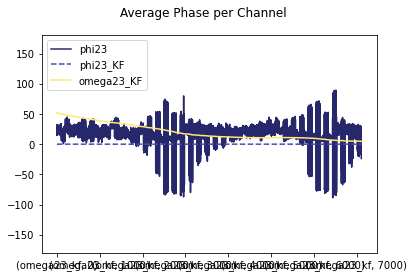

In [31]:
sdata.unstack(level=0)[['phi23']].plot(subplots=True, title="Average Phase per Channel", ylim=[-180,+180], color= '#27286c', label='phi23', legend=True)
sdata.unstack(level=0)[['phi23_kf']].plot(subplots=True, title="Average Phase per Channel", ylim=[-180,+180], color= '#4849ad', linestyle='dashed', label='phi23_KF', legend=True)
sdata.unstack(level=0)[['omega23_kf']].plot(subplots=True, title="Average Phase per Channel", ylim=[-180,+180], color= '#FFE873', label='omega23_KF', legend=True)


In [32]:
np.average(sdata['phi23']), np.average(sdata['phi23_kf']), np.average(sdata['omega23_kf'])

(16.448798889914162, -0.0042854393849148156, 20.413826316650912)

C:\Users\pooneh\AppData\Local\Continuum\anaconda3\envs\py3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\pooneh\AppData\Local\Continuum\anaconda3\envs\py3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\pooneh\AppData\Local\Continuum\anaconda3\envs\py3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


array([<AxesSubplot:>], dtype=object)

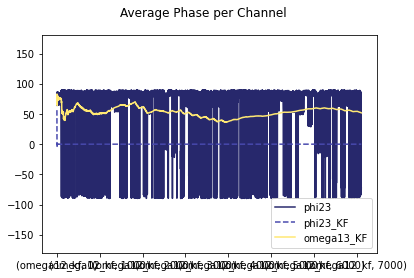

In [33]:
sdata.unstack(level=0)[['phi12']].plot(subplots=True, title="Average Phase per Channel", ylim=[-180,+180], color= '#27286c', label='phi23', legend=True)
sdata.unstack(level=0)[['phi12_kf']].plot(subplots=True, title="Average Phase per Channel", ylim=[-180,+180], color= '#4849ad', linestyle='dashed', label='phi23_KF', legend=True)
sdata.unstack(level=0)[['omega12_kf']].plot(subplots=True, title="Average Phase per Channel", ylim=[-180,+180], color= '#FFE873', label='omega13_KF', legend=True)


In [34]:
np.average(sdata['phi12']), np.average(sdata['phi12_kf']), np.average(sdata['omega12_kf'])

(55.24085644253681, -0.0028171090041678526, 53.19764817084417)

C:\Users\pooneh\AppData\Local\Continuum\anaconda3\envs\py3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\pooneh\AppData\Local\Continuum\anaconda3\envs\py3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\pooneh\AppData\Local\Continuum\anaconda3\envs\py3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


array([<AxesSubplot:>], dtype=object)

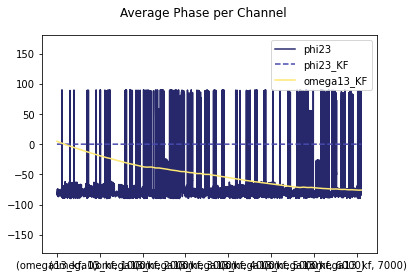

In [35]:
sdata.unstack(level=0)[['phi13']].plot(subplots=True, title="Average Phase per Channel", ylim=[-180,+180], color= '#27286c', label='phi23', legend=True)
sdata.unstack(level=0)[['phi13_kf']].plot(subplots=True, title="Average Phase per Channel", ylim=[-180,+180], color= '#4849ad', linestyle='dashed', label='phi23_KF', legend=True)
sdata.unstack(level=0)[['omega13_kf']].plot(subplots=True, title="Average Phase per Channel", ylim=[-180,+180], color= '#FFE873', label='omega13_KF', legend=True)


In [36]:
np.average(sdata['phi13']), np.average(sdata['phi13_kf']), np.average(sdata['omega13_kf'])

(-63.00629061349498, -0.0071928827726604, -47.905410508144215)

In [37]:
phi_channel = []
for i in range(0, len(data),96):
    phi_channel.append({"channel":data['channel'][i], 
                       "ave_phi12": np.average(sdata['phi12'][i-96:i]),
                       "ave_phi23": np.average(sdata['phi23'][i-96:i]), 
                       "ave_phi13": np.average(sdata['phi13'][i-96:i]),
                       "teta12_kf": np.average(sdata['phi12_kf'][i-96:i]),
                       "teta23_kf": np.average(sdata['phi23_kf'][i-96:i]),
                       "teta13_kf": np.average(sdata['phi13_kf'][i-96:i]), 
                       "omega12": np.average(sdata['omega12_kf'][i-96:i]),
                       "omega23": np.average(sdata['omega23_kf'][i-96:i]),
                       "omega13": np.average(sdata['omega13_kf'][i-96:i])})
saverage_phi_perchannel = pd.DataFrame(phi_channel)
saverage_phi_perchannel =  saverage_phi_perchannel.drop([0])

C:\Users\pooneh\AppData\Local\Continuum\anaconda3\envs\py3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\pooneh\AppData\Local\Continuum\anaconda3\envs\py3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


array([<AxesSubplot:>], dtype=object)

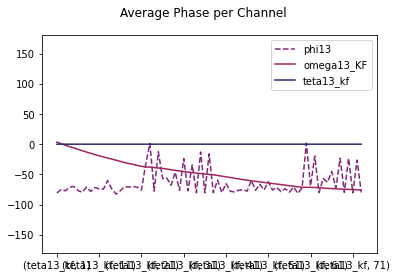

In [38]:
saverage_phi_perchannel.unstack(level=0)[['ave_phi13']].plot(subplots=True, title="Average Phase per Channel", ylim=[-180,+180], color= '#812878', linestyle='dashed',  label='phi13', legend=True)
saverage_phi_perchannel.unstack(level=0)[['omega13']].plot(subplots=True, title="Average Phase per Channel", ylim=[-180,+180], color= '#A22160', label='omega13_KF', legend=True)
saverage_phi_perchannel.unstack(level=0)[['teta13_kf']].plot(subplots=True, title="Average Phase per Channel", ylim=[-180,+180], color= '#27286c', label='teta13_kf', legend=True)


array([<AxesSubplot:>], dtype=object)

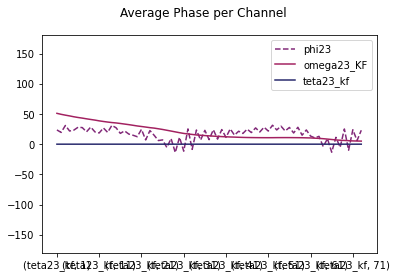

In [39]:
saverage_phi_perchannel.unstack(level=0)[['ave_phi23']].plot(subplots=True, title="Average Phase per Channel", ylim=[-180,+180], color= '#812878', linestyle='dashed',  label='phi23', legend=True)
saverage_phi_perchannel.unstack(level=0)[['omega23']].plot(subplots=True, title="Average Phase per Channel", ylim=[-180,+180], color= '#A22160', label='omega23_KF', legend=True)
saverage_phi_perchannel.unstack(level=0)[['teta23_kf']].plot(subplots=True, title="Average Phase per Channel", ylim=[-180,+180], color= '#27286c', label='teta23_kf', legend=True)


array([<AxesSubplot:>], dtype=object)

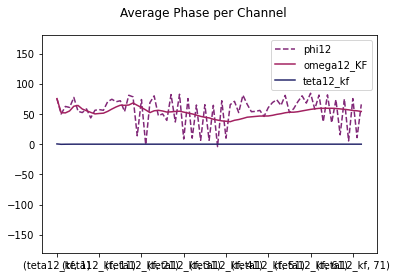

In [40]:
saverage_phi_perchannel.unstack(level=0)[['ave_phi12']].plot(subplots=True, title="Average Phase per Channel", ylim=[-180,+180], color= '#812878', linestyle='dashed',  label='phi12', legend=True)
saverage_phi_perchannel.unstack(level=0)[['omega12']].plot(subplots=True, title="Average Phase per Channel", ylim=[-180,+180], color= '#A22160', label='omega12_KF', legend=True)
saverage_phi_perchannel.unstack(level=0)[['teta12_kf']].plot(subplots=True, title="Average Phase per Channel", ylim=[-180,+180], color= '#27286c', label='teta12_kf', legend=True)


In [41]:
saverage_phi_perchannel

,channel,ave_phi12,ave_phi23,ave_phi13,teta12_kf,teta23_kf,teta13_kf,omega12,omega23,omega13
1,31,75.653014,23.536170,-80.810817,0.405872,-0.001107,-0.004500,75.398085,51.064629,3.374636
2,26,49.969694,19.452901,-74.952405,-0.209550,-0.001423,-0.004720,52.165699,49.422611,0.829709
3,8,62.459766,30.975733,-77.189501,-0.101154,-0.001676,-0.004934,51.781430,48.044566,-1.684239
4,7,60.839003,21.797177,-71.113819,-0.046403,-0.001897,-0.005126,55.021846,46.784545,-4.028133
5,27,77.362222,23.266263,-69.996515,-0.006185,-0.002140,-0.005301,62.829735,45.379000,-6.224993
...,...,...,...,...,...,...,...,...,...,...
69,17,74.815598,25.136404,-80.047998,0.000297,-0.004476,-0.007584,57.700969,6.171924,-74.585000
70,35,5.381722,-10.011309,-23.379588,0.000108,-0.004470,-0.007555,56.886399,5.801085,-74.908177
71,16,75.449462,23.891746,-80.658791,-0.000132,-0.004467,-0.007523,55.811906,5.392578,-75.190844
72,34,10.842352,5.999205,-26.283444,-0.000257,-0.004438,-0.007490,55.221025,5.233425,-75.448607


In [42]:
w = []
for n in range(0,11):
    w.append(2404.25 + n*2)
for n in range(11, 37):
    w.append(2428.25 + (n-11)*2)

In [43]:
omegat = []
for i in range(37):
    channel_posi = np.where(saverage_phi_perchannel['channel'] == i)
    channel_posi_arr = np.array(channel_posi)
    if np.any(channel_posi_arr) == True:
        saverage_phi_perchannel['omega12_kf'] = ((2.9*1e10)/(3.5*2*np.pi)*(1/w[i])*10**-6*saverage_phi_perchannel['omega12']) # c/f * xx * 1/2pi * 1/d
        saverage_phi_perchannel['omega23_kf'] = ((2.9*1e10)/(3.5*np.pi)*(1/w[i])*10**-6*saverage_phi_perchannel['omega23'])
        saverage_phi_perchannel['omega13_kf'] = ((2.9*1e10)/(2*3.5*2*np.pi)*(1/w[i])*10**-6*saverage_phi_perchannel['omega13'])
        saverage_phi_perchannel['teta12'] = ((2.9*1e10)/(3.5*2*np.pi)*(1/w[i])*10**-6*saverage_phi_perchannel['ave_phi12']) # c/f * xx * 1/2pi * 1/d
        saverage_phi_perchannel['teta23'] = ((2.9*1e10)/(3.5*np.pi)*(1/w[i])*10**-6*saverage_phi_perchannel['ave_phi23'])
        saverage_phi_perchannel['teta13'] = ((2.9*1e10)/(2*3.5*2*np.pi)*(1/w[i])*10**-6*saverage_phi_perchannel['ave_phi13'])
        saverage_phi_perchannel['theta12_kf'] = ((2.9*1e10)/(3.5*2*np.pi)*(1/w[i])*10**-6*saverage_phi_perchannel['teta12_kf']) # c/f * xx * 1/2pi * 1/d
        saverage_phi_perchannel['theta23_kf'] = ((2.9*1e10)/(3.5*np.pi)*(1/w[i])*10**-6*saverage_phi_perchannel['teta23_kf'])
        saverage_phi_perchannel['theta13_kf'] = ((2.9*1e10)/(2*3.5*2*np.pi)*(1/w[i])*10**-6*saverage_phi_perchannel['teta13_kf'])

In [44]:
np.average(saverage_phi_perchannel['teta12']), np.average(saverage_phi_perchannel['teta23']), 2*np.average(saverage_phi_perchannel['teta13'])

(29.74307078620004, 17.635879693020783, -33.82111931809342)

In [46]:
np.average(saverage_phi_perchannel['theta12_kf']), np.average(saverage_phi_perchannel['theta23_kf']), 2*np.average(saverage_phi_perchannel['theta13_kf'])

(-0.0015146358984420264, -0.004559305418999506, -0.003825655690101467)

array([<AxesSubplot:>], dtype=object)

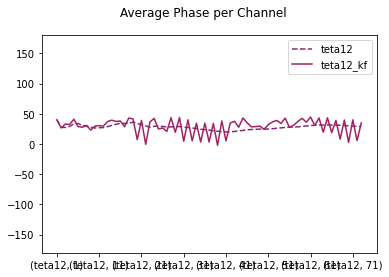

In [47]:
saverage_phi_perchannel.unstack(level=0)[['omega12_kf']].plot(subplots=True, title="Average Phase per Channel", ylim=[-180,+180], color= '#812878', linestyle='dashed',  label='teta12', legend=True)
saverage_phi_perchannel.unstack(level=0)[['teta12']].plot(subplots=True, title="Average Phase per Channel", ylim=[-180,+180], color= '#A22160', label='teta12_kf', legend=True)


array([<AxesSubplot:>], dtype=object)

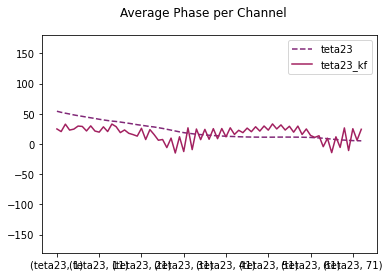

In [49]:
saverage_phi_perchannel.unstack(level=0)[['omega23_kf']].plot(subplots=True, title="Average Phase per Channel", ylim=[-180,+180], color= '#812878', linestyle='dashed',  label='teta23', legend=True)
saverage_phi_perchannel.unstack(level=0)[['teta23']].plot(subplots=True, title="Average Phase per Channel", ylim=[-180,+180], color= '#A22160', label='teta23_kf', legend=True)


array([<AxesSubplot:>], dtype=object)

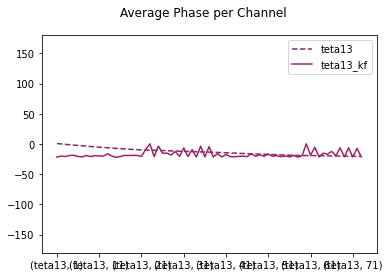

In [51]:
saverage_phi_perchannel.unstack(level=0)[['omega13_kf']].plot(subplots=True, title="Average Phase per Channel", ylim=[-180,+180], color= '#812878', linestyle='dashed',  label='teta13', legend=True)
saverage_phi_perchannel.unstack(level=0)[['teta13']].plot(subplots=True, title="Average Phase per Channel", ylim=[-180,+180], color= '#A22160', label='teta13_kf', legend=True)


In [59]:
A12 = np.vstack([saverage_phi_perchannel['teta12'], np.ones(len(saverage_phi_perchannel))]).T
A23 = np.vstack([saverage_phi_perchannel['teta23'], np.ones(len(saverage_phi_perchannel))]).T
A13 = np.vstack([saverage_phi_perchannel['teta13'], np.ones(len(saverage_phi_perchannel))]).T

In [60]:
m12, c12 = np.linalg.lstsq(A12, saverage_phi_perchannel['omega12_kf'], rcond=None)[0]
m23, c23 = np.linalg.lstsq(A23, saverage_phi_perchannel['omega23_kf'], rcond=None)[0]
m13, c13 = np.linalg.lstsq(A13, saverage_phi_perchannel['omega13_kf'], rcond=None)[0]

In [61]:
saverage_phi_perchannel['linear_fit12']= m12*saverage_phi_perchannel['teta12'] + c12
saverage_phi_perchannel['linear_fit23']= m23*saverage_phi_perchannel['teta23'] + c23
saverage_phi_perchannel['linear_fit13']= m13*saverage_phi_perchannel['teta13'] + c13

array([<AxesSubplot:>], dtype=object)

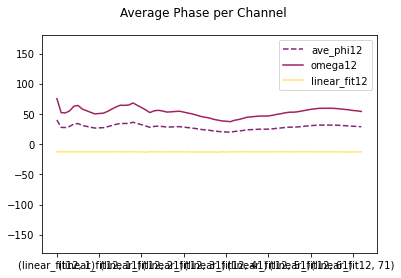

In [63]:
saverage_phi_perchannel.unstack(level=0)[['omega12_kf']].plot(subplots=True, title="Average Phase per Channel", ylim=[-180,+180], color= '#812878', linestyle='dashed',  label='ave_phi12', legend=True)
saverage_phi_perchannel.unstack(level=0)[['omega12']].plot(subplots=True, title="Average Phase per Channel", ylim=[-180,+180], color= '#A22160', label='omega12', legend=True)
saverage_phi_perchannel.unstack(level=0)[['linear_fit12']].plot(subplots=True, title="Average Phase per Channel", ylim=[-180,+180], color= '#FFE873', label='linear_fit12', legend=True)


In [56]:
np.average(saverage_phi_perchannel['linear_fit12'])

-12.642708975077275

-12.642708975077275

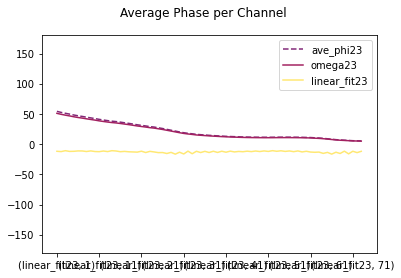

In [64]:
saverage_phi_perchannel.unstack(level=0)[['omega23_kf']].plot(subplots=True, title="Average Phase per Channel", ylim=[-180,+180], color= '#812878', linestyle='dashed',  label='ave_phi23', legend=True)
saverage_phi_perchannel.unstack(level=0)[['omega23']].plot(subplots=True, title="Average Phase per Channel", ylim=[-180,+180], color= '#A22160', label='omega23', legend=True)
saverage_phi_perchannel.unstack(level=0)[['linear_fit23']].plot(subplots=True, title="Average Phase per Channel", ylim=[-180,+180], color= '#FFE873', label='linear_fit23', legend=True)
np.average(saverage_phi_perchannel['linear_fit23'])

-12.64270897507727

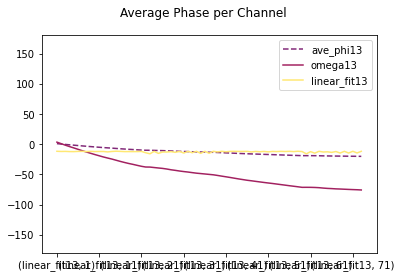

In [65]:
saverage_phi_perchannel.unstack(level=0)[['omega13_kf']].plot(subplots=True, title="Average Phase per Channel", ylim=[-180,+180], color= '#812878', linestyle='dashed',  label='ave_phi13', legend=True)
saverage_phi_perchannel.unstack(level=0)[['omega13']].plot(subplots=True, title="Average Phase per Channel", ylim=[-180,+180], color= '#A22160', label='omega13', legend=True)
saverage_phi_perchannel.unstack(level=0)[['linear_fit13']].plot(subplots=True, title="Average Phase per Channel", ylim=[-180,+180], color= '#FFE873', label='linear_fit13', legend=True)
np.average(saverage_phi_perchannel['linear_fit13'])